## UPISATI IME I PREZIME!
# 5. LABORATORIJSKA VJEŽBA - MJERENJE ZRAČENIH SMETNJI
---
U ovoj laboratorijskoj vježbi mjerit će se zračene smetnje prekidačkog napajanja prema prikazanoj shemi.

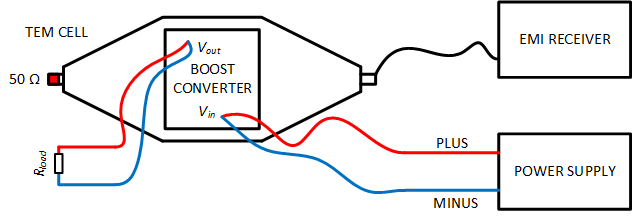

# PRIPREMA
---
1. Proučiti princip rada TEM ćelije. Znati objasniti razliku u mjerenju s obzirom na različite pozicije tiskane pločice (DUT-a).

## EMI prijamnik

U ovoj vježbi će se EMI prijamnik koristiti u _Receiver Mode_ načinu rada radi veće brzine mjerenja. Mjerenja će se izvoditi izravnim uzorkovanjem u vremenskoj domeni (engl. _time domain scan_)<br>
<code><b>MODE</b>->Receiver</code>
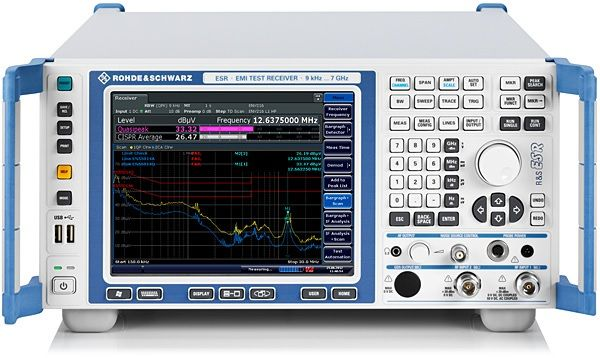

Rezultati mjerenja EMI prijamnikom uporedit će se s granciama prema IEC619672 standardu prikazanima slikom. Granice se definiraju pozivom funkcije <code>IEC61967_limits(limit_type)</code>, gdje je argument <code>limit_type</code> tipa _string_ koji maksimalno sadrži tri znaka:
> **veliko slovo** označava nagib granice 0 db/dek <br>
> **broj** označava nagib granice -20 dB/dek <br>
> **malo slovo** označava nagib granice -40 dB/dek <br>

Npr. pozivom funkcije <code>IEC61967_limits('G8f')</code> dobit ćemo granicu koja je istaknuta na prikazanoj slici.


In [1]:
def IEC61967_limits(type):
    freq_temp = np.linspace(0.15e6, 1000e6, num=1000)
    lines = np.empty([3,len(freq_temp)])
    lines[:] = np.nan
    limit = np.empty([len(freq_temp)])
            
    k = -1
    for i in range(len(type)):
        if type[i].isupper(): # flat
            level = 90 - (ord(type[i])-64)*6 # ascii(A) = 65; A = 84 dBuV, B = 78 dBuV
            k = k + 1
            lines[k,:].fill(level)
        elif type[i].islower(): # -40 dB/dek
            # ascii(z) = 122, ascii(y) = 121 
            # z@1e6 = 12; y@1e6 = 18
            temp = (-ord(type[i])+122)*6-40*(np.log10(freq_temp)-6)
            k = k + 1
            lines[k,:]=temp
    for i in range(len(type)):
        if type[i].isdigit(): # -20 dB/dek
            # 19@1e6 = 6; 18@1e6 = 12
            numfromtype=int(''.join(c for c in type if c.isdigit()))
            temp = 6+(-int(numfromtype)+19)*6-20*(np.log10(freq_temp)-6)
            k = k + 1
            lines[k,:]=temp
            break
        else:
            continue  # only executed if the inner loop did NOT break
        break  # only executed if the inner loop DID break
            
    for i in range(len(freq_temp)):
        limit[i] = min(lines[0,i],lines[1,i],lines[2,i])        
    
    return limit, freq_temp

## TEM ćelija

TEM ćelija koja se koristi u ovoj vježbi prikazana je na slici. 



TEM ćelija je u osnovi koaksijalni kabel pravokutnog presjeka, gdje se središnji vod zove septum. Suženja (eng. _tapers_) na svakoj strani omogućavaju spajanje TEM ćelije na kabele tj. laboratorijsku opremu. TEM ćelija na jednoj strani ima otvor dimenzija 100 x 100 mm koji služi za postavljanje tiskane pločice s DUT-om (eng. _Device Under Test_). Taj otvor na svojim rubovima ima RF brtve (eng. _gaskets_) koje služe za spajanje oplošja TEM ćelije s masom tiskane pločice s ciljem ostvarenja neprekinutog oplošja kao i potpuno oklopljenog mjernog okruženja neosjetljivog na vanjske smetnje. Konstrukcija TEM ćelije mora biti takva da njezina karakteristična impedancija $Z$ bude što bliža iznosu $50~\Omega$ po cijeloj dužini s ciljem smanjenja refleksija i njihovog utjecaja na amplitudu stojnih valova te posljedično na uniformnost električnog polja. Poznavajući napon $U$ na TEM ćeliji i razmak $d$ između septuma i DUT-a, može se izračunati iznos električnog polja kao $E=U/d=\sqrt{P\cdot Z}/d$. 

TEM ćelija svoj rad temelji na TEM (eng. _transverse electromagentic_) propagaciji EM vala. TEM propagacija podrazumijeva EM val kojemu su vektori magnetskog e električnog polja međusobno okomiti i ujedno okomiti na smjer propagacije. Upravo TEM propagacija je propagacija planarnog vala u dalekom polju. Gornja granična frekvencija TEM ćelije definirana je s maksimalnom frekvencijom do koje je podržana TEM propagacija. Na višim frekvencijama pojavljuju se drugi modovi propagacije čija analiza postaje složenija. U pravilu, što je TEM ćelija veća to je gornja granična frekvencija niža. 

Pri mjerenju emisije smetnji DUT-a, tiskanu pločicu postavljamo tako da DUT gleda prema septumu, a sve ostale komponente koje nisu bitne u analizi postavljaju se s druge strane tiskane pločice. U ovoj vježbi DUT predstavlja prekidačko napajanje i ono generira EM polje unutar TEM ćelije. Ovisno o položaju DUT-a ovisit će iznos mjerenih smetnji. Položaj tiskane pločice gdje se silnice EM polja DUT-a podudaraju sa smjerom silnica definiranim TEM propagacijom povećat će spregu, dok položaj DUT-a u kojem se silnice međusobno poništavaju rezultirat će smanjenom spregom. Iz zog razloga potrebno je okretati tiskanu pločicu na kojoj se nalazi DUT s ciljem nalaženja maksimalnog iznosa smetnji. Na primjeru prikazanom na slici tisana pločica je postavljena u položaj "4".

## Laboratorijski izvor E3646A
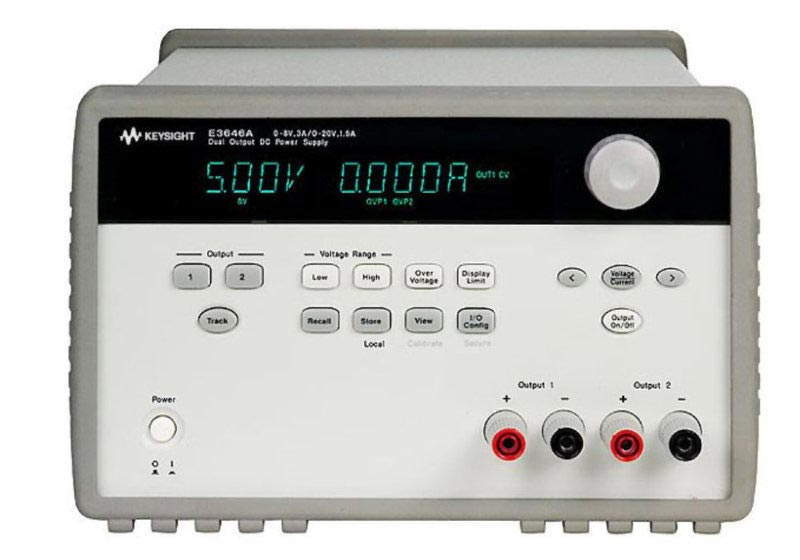

# RAD U LABORATORIJU
---
<b>VAŽNO!</b> Prije početka rada s instrumentom potrebno je staviti uzemljenu narukvicu. Provjerite je li narukvica ispravno spojena na uzemljenje. 

1. Na matičnu ploču spojiti prekidačko napajanje s oznakom zadanoj prema tablici. **Obratiti pažnju na orijentaciju naljepnice**. 
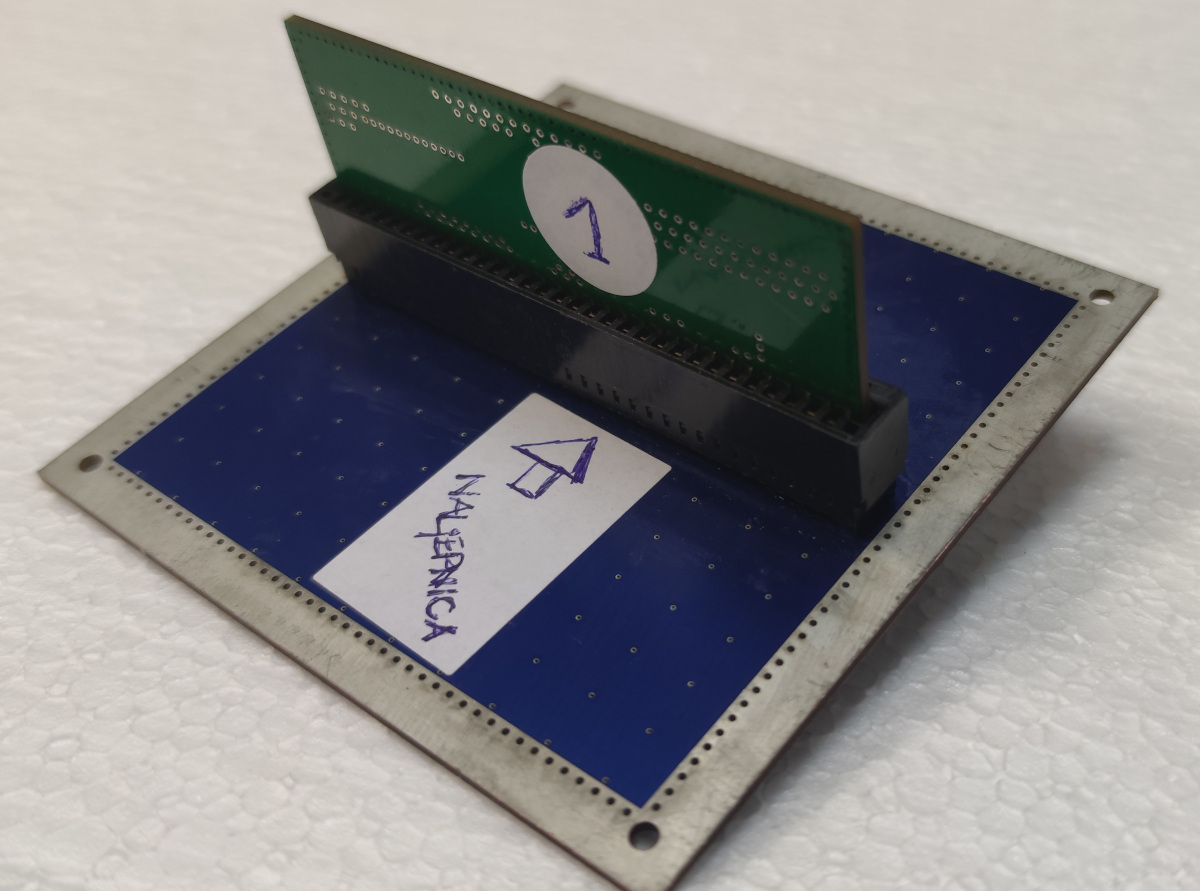

2. Otpustiti pritezne spravice na TEM ćeliji. Postaviti matičnu tiskanu pločicu tako da tiskana pločica prekidačkog napajanja bude postavljena u smjeru septuma tj. longitudinalno s obzirom na septum. Pločicu centirati (kao orijentir koristiti rupe za vijke) i stegnuti pritezne spravice.

3. Spojiti izlaz prekidačkog napajanja na otpornik zadan prema tablici. Da bi ostvarili zadani iznos koristite kleme odgovarajuću kombinaciju raspoloživih otpornika. Ulaz prekidačkog napajanja spojiti na 1. izlaz (Output 1) laboratorijskog izvora.

4. Jednu stranu TEM ćelije zaključiti s $50~\Omega$ zaključenjem, a drugu spojiti na EMI prijamnik. Uključiti EMI prijaminik. 

5. Uključiti laboratorijski izvor i podesiti ulazni napon prekidačkog napajanja na iznos <font color='red'>**5 V**</font> i ograničiti ulaznu struju na <font color='red'>**500 mA**</font>. Za podešavanje točnih vrijednosti koristiti kotačić za podešavanje.
><code> <b>Output</b>->1</code> <br> 
><code> <b>Display Limit</b>->**Voltage**/Current->5 V</code> <br> 
><code> <b>Display Limit</b>->Voltage/**Current**->500 mA</code> <br>

6. Uključiti izlaz laboratorijskog izvora (da bi se napon pojavio na 1. izlazu potrebno ga je uključiti).
><code> <b>Output On/Off</b></code> <br>

**Provjerite s univerzalnim instrumentom napon na izlaznom otporniku. On bi trebao iznositi ~9 V.** Izračunajte izlaznu snagu na otporniku. Uz pretpostavku da prekidačko napajanje radi s 100% učinkovitosti, uz ulazni napon 5 V izračunajte ulaznu struju i usporedite ju sa strujom prikazanom na laboratorijskom izvoru.
<br> 
<br>
<br> 
<br>

7. Podesiti sljedeće parametre EMI prijamnika
><code> <b>MODE</b>->Receiver</code> <br> 
><code> <b>MEAS</b>->Test Automation->Overview->Current</code> <br> 
><code> <b>MEAS</b>->Test Automation->Scan Table->Time Domain Scan->ON</code> <br> 
><code> <b>FREQ</b>->Stepsize->Auto Fine</code> <br>
><code> <b>AMPT</b>->Unit->dBuV</code> <br>
><code> <b>AMPT</b>->Grid Min Level->0 dBuV</code> <br>
><code> <b>AMPT</b>->Grid Range->100 dBuV</code> <br>
><code> <b>AMPT</b>->RF Atten Manual->10 dB</code> <br>
><code> <b>SWEEP</b>->Freq Axis->Log</code> <br>
><code> <b>FREQ</b>->Start Frequency->150 kHz</code> <br>
><code> <b>FREQ</b>->Stop Frequency->1 GHz</code> <br>

8. Postaviti RBW na 120 kHz
><code> <b>BW</b>->Res BW Manual->120 kHz</code> <br>

9. Za Trace 1 postaviti način prikaza na _Max Hold_ i odabrati _Quasi Peak_ detektor.
><code> <b>TRACE</b>->Trace 1->Max Hold</code> <br>
><code> <b>TRACE</b>->Trace 1->Scan Detector->Quasi Peak</code> <br>

10. <b>Pokrenuti mjerenje i pričekati da završi</b> <br>
><code> <b>RUN SINGLE</b></code> <br>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib widget

12. Pohraniti mjereni frekvencijski spektar zračenih smetnji za zadanu poziciju. Dati odgovarajući naziv mjerenju, npr. NAP3-POS4

In [ ]:
label1 = # <-----------------------------
filename1='meas1.DAT'
data = pd.read_csv(filename1, delimiter=';',skiprows=33,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x1 = data['freq'].drop([0]).astype('float')/1e6
y1 = data['dB'].drop([0]).astype('float')

13. Isključiti izlaz laboratorijskog izvora.
><code> <b>Output On/Off</b></code> <br>

14. Otpustiti stezne spravice. Postaviti tiskanu pločicu tako da prekidačko napajanje bude postavljeno u smjeru septuma tj. longitudinalno s obzirom na septum, ali u drugom smjeru s obzirom na prethodni položaj. Pločicu centirati (kao orijentir koristiti rupe za vijke) i stegnuti pritezne spravice.

15. Uključiti izlaz laboratorijskog izvora.
><code> <b>Output On/Off</b></code> <br>

16. <b>Pokrenuti mjerenje i pričekati da završi</b> <br>
><code> <b>RUN SINGLE</b></code> <br>

17. Pohraniti mjereni frekvencijski spektar zračenih smetnji za zadanu poziciju. Dati odgovarajući naziv mjerenju, npr. NAP3-POS2

In [ ]:
label2 = # <-----------------------------
filename2='meas2.DAT'
data = pd.read_csv(filename2, delimiter=';',skiprows=33,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x2 = data['freq'].drop([0]).astype('float')/1e6
y2 = data['dB'].drop([0]).astype('float')

18. Prikazati oba mjerenja i <font color='red'>**pronaći minimalnu granicu smetnji**</font> koristeći funkciju <code><b>IEC61967_limits(type)</b></code>. Po potrebi promijeniti u kodu slijed linija za iscrtavanje mjerenja s ciljem da se oba mjerenja što bolje vide.

In [5]:
# učitavanje granica
limit_type1 = 'Gf' # <-----------------------------
limit1, freq1 = IEC61967_limits(limit_type1)

In [ ]:
# učitavanje mjerenja
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca() 
axes.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [MHz]')    
plt.title('Slika 1. - longitudinalni položaj')
plt.ylabel('Napon [dBuV]')
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
axes.plot(x1,y1, linestyle='-',label=label1, color=cycle[1], linewidth=3) 
axes.plot(x2,y2, linestyle='-',label=label2, color=cycle[2], linewidth=3) 

axes.plot(freq1/1e6,limit1, linestyle=':',label=limit_type1, linewidth=3, color='r')
leg = axes.legend()

19. Isključiti izlaz laboratorijskog izvora.
><code> <b>Output On/Off</b></code> <br>

20. Otpustiti stezne spravice. Postaviti tiskanu pločicu tako da prekidačko napajanje bude postavljeno okomito na smjer septuma tj. transverzalno s obzirom na septum. Pločicu centirati (kao orijentir koristiti rupe za vijke) i stegnuti pritezne spravice.

21. Uključiti izlaz laboratorijskog izvora.
><code> <b>Output On/Off</b></code> <br>

22. <b>Pokrenuti mjerenje i pričekati da završi</b> <br>
><code> <b>RUN SINGLE</b></code> <br>

23. Pohraniti mjereni frekvencijski spektar zračenih smetnji za zadanu poziciju. Dati odgovarajući naziv mjerenju, npr. NAP3-POS3

In [ ]:
label3 = # <-----------------------------
filename3='meas3.DAT'
data = pd.read_csv(filename3, delimiter=';',skiprows=33,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x3 = data['freq'].drop([0]).astype('float')/1e6
y3 = data['dB'].drop([0]).astype('float')

24. Isključiti izlaz laboratorijskog izvora.
><code> <b>Output On/Off</b></code> <br>

25. Otpustiti stezne spravice. Postaviti tiskanu pločicu tako da prekidačko napajanje bude postavljeno okomito na smjer septuma tj. transverzalno s obzirom na septum, ali u drugom smjeru s obzirom na prethodni položaj. Pločicu centirati (kao orijentir koristiti rupe za vijke) i stegnuti pritezne spravice.

26. Uključiti izlaz laboratorijskog izvora.
><code> <b>Output On/Off</b></code> <br>

27. <b>Pokrenuti mjerenje i pričekati da završi</b> <br>
><code> <b>RUN SINGLE</b></code> <br>

28. Pohraniti mjereni frekvencijski spektar zračenih smetnji za zadanu poziciju. Dati odgovarajući naziv mjerenju, npr. NAP3-POS1

In [ ]:
label4 = # <-----------------------------
filename4='meas4.DAT'
data = pd.read_csv(filename4, delimiter=';',skiprows=33,usecols = (0,1), encoding='latin1')
data.columns = ['freq', 'dB']
data = data.dropna()
x4 = data['freq'].drop([0]).astype('float')/1e6
y4 = data['dB'].drop([0]).astype('float')

29. Prikazati oba mjerenja i <font color='red'>**pronaći minimalnu granicu smetnji**</font> koristeći funkciju <code><b>IEC61967_limits(type)</b></code>. Po potrebi promijeniti u kodu slijed linija za iscrtavanje mjerenja s ciljem da se oba mjerenja što bolje vide.

In [ ]:
# učitavanje granica
limit_type2 = 'Gf' # <-----------------------------
limit2, freq2 = IEC61967_limits(limit_type2)

In [ ]:
# učitavanje mjerenja
fig = plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})      
axes = plt.gca() 
axes.set_xscale("log")
plt.grid(True,which="both",ls=":")
plt.xlabel('Frekvencija [MHz]')    
plt.title('Slika 2. - transverzalni položaj')
plt.ylabel('Napon [dBuV]')
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
axes.plot(x3,y3, linestyle='-',label=label3, color=cycle[1], linewidth=3) 
axes.plot(x4,y4, linestyle='-',label=label4, color=cycle[2], linewidth=3) 

axes.plot(freq2/1e6,limit2, linestyle=':',label=limit_type2, linewidth=3, color='r')
leg = axes.legend()

30. Navedite granice smetnje koja odgovara najgorem slučaju. Zašto je taj slučaj najgori po pitanju emitiranih smetnji?
<br>
<br>
<br>
<br>
<br>